In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("C:\\Users\\prans\\Downloads\\final_data.csv")
df.head()

,Unnamed: 0,address,owners,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,0,"Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...",Mahendra Kotwal,Apartment,old,3.0,75.00,39.72,1550.0,Sheetal Vihar,19.987960,73.787390
1,1,"Samraat Dream Citi, Samta Nagar, Nashik",Jiten Dadarkar,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,2,"Suryaprakash Apartment,Nashik Road, Nashik",Pankaj,Apartment,old,2.0,53.35,28.25,970.0,Surya Prakash,19.975850,73.788750
3,3,"Adishvar Residency,Nashik Road, Nashik",Saurav,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,4,"Nashik Road, Nashik",Vivek Pavanaskar,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890


In [47]:
df.shape

(5496, 12)

In [48]:
df_temp = df.groupby("house_condition")
df_newhouse = df_temp.get_group('new')
df_oldhouse = df_temp.get_group('old')
df_oldhouse = df_oldhouse.dropna(axis =0).reset_index(drop=True)
df_newhouse = df_newhouse.dropna(axis=0).reset_index(drop=True)
df2  = df.dropna(axis=0).reset_index(drop=True)

In [49]:
df_newhouse.shape

(1766, 12)

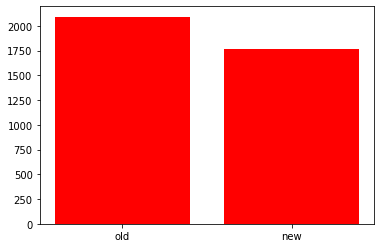

In [50]:
x = ["old","new"]
y = [df_oldhouse.shape[0],df_newhouse.shape[0]]
plt.bar(x,y,color ="red")
plt.show()

In [98]:
#here no need to divide location as can use latitiude and longitude to predicgt price
# for old
X = df_oldhouse[["BHK","latitude","longitude","total_sqft","per_month_emi"]]
Y = df_oldhouse.price
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 10)
reg_old = linear_model.LinearRegression()

reg_old.fit(X_train,y_train)
reg_old.score(X_test,y_test)

0.36644615605496866

In [97]:
X = df_newhouse[["BHK","latitude","longitude","total_sqft","per_month_emi"]]
Y = df_newhouse.price
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 10)
reg_new = linear_model.LinearRegression()

reg_new.fit(X_train,y_train)
reg_new.score(X_test,y_test)

0.5044530332844809

In [96]:
X = df2[["BHK","latitude","longitude","total_sqft","per_month_emi"]]
Y = df2.price
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 10)
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.4745643747953774

In [54]:
df.corr()

,Unnamed: 0,BHK,price,per_month_emi,total_sqft,latitude,longitude
Unnamed: 0,1.000000,0.322345,0.008132,0.140371,0.210250,-0.002589,-0.008834
BHK,0.322345,1.000000,0.112950,0.323188,0.556302,0.026139,0.015893
price,0.008132,0.112950,1.000000,0.060161,0.585160,-0.001290,-0.001282
per_month_emi,0.140371,0.323188,0.060161,1.000000,0.300182,0.003426,-0.006404
total_sqft,0.210250,0.556302,0.585160,0.300182,1.000000,0.008800,-0.010929
latitude,-0.002589,0.026139,-0.001290,0.003426,0.008800,1.000000,0.709420
longitude,-0.008834,0.015893,-0.001282,-0.006404,-0.010929,0.709420,1.000000


In [55]:
#price relation minimal with per month emi and latitude longitude

In [11]:
df["housetype"].describe

<bound method NDFrame.describe of 0               Apartment
1               Apartment
2               Apartment
3               Apartment
4               Apartment
              ...        
5491    Independent house
5492    Independent house
5493    Independent house
5494    Independent house
5495    Independent house
Name: housetype, Length: 5496, dtype: object>

In [12]:
#to improve prediction need to seperate housetype combine old and new with diff columns 

In [13]:
len(df["cordinates"].unique())

628

In [14]:
df.cordinates = df.cordinates.apply(lambda x:x.strip())
location = df.groupby("cordinates")["cordinates"].agg("count").sort_values(ascending = False)
location


cordinates
Nashik Road, Nashik, Maharashtra                           321
Damodar Nagar, Pathardi Phata, Nashik, Maharashtra         147
Kala Nagar, Indira Nagar, Nashik, Maharashtra              133
Panchavati, Nashik, Maharashtra                            127
Makhmalabad, Makhamalabad, Nashik, Maharashtra             108
                                                          ... 
Niki Heights                                                 1
New Railway Colony, Sanbhaji Nagar, Nashik, Maharashtra      1
New Hariom Co-op Housing Society                             1
Near, Palampur Sub-District, Kangra, Himachal Pradesh        1
Yogiraj                                                      1
Name: cordinates, Length: 628, dtype: int64

In [15]:
len(location[location<=5])

455

In [16]:
df.cordinates = df.cordinates.apply(lambda x:"other" if x in location[location<=5]else x)
df

,Unnamed: 0,address,owners,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,0,"Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...",Mahendra Kotwal,Apartment,old,3.0,75.00,39.72,1550.0,other,19.987960,73.787390
1,1,"Samraat Dream Citi, Samta Nagar, Nashik",Jiten Dadarkar,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,2,"Suryaprakash Apartment,Nashik Road, Nashik",Pankaj,Apartment,old,2.0,53.35,28.25,970.0,other,19.975850,73.788750
3,3,"Adishvar Residency,Nashik Road, Nashik",Saurav,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,4,"Nashik Road, Nashik",Vivek Pavanaskar,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890
...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,"Prashant Nagar, Pathardi Phata,Nashik",Datta Kale,Independent house,old,4.0,92.25,45.80,NaN,"Prashant Nagar, Pathardi Phata, Nashik, Mahara...",19.951040,73.756990
5492,5492,"Vasantdadanagar, Adgaon,Nashik",Geeta Buildcon,Independent house,old,2.0,NaN,NaN,NaN,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780,73.855100
5493,5493,"Samarth Nagar, Makhmalabad,Nashik",Atharvashree Buildmat Private Limited,Independent house,old,2.0,34.32,18.17,NaN,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050,73.796960
5494,5494,"Bhor Town Ship, Nashik",Shree Prakash Developers,Independent house,old,NaN,NaN,NaN,NaN,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090,73.821100


In [17]:
df = df.drop(["Unnamed: 0","address","owners"],axis = 1)

In [18]:
len(df.cordinates.unique())

174

In [19]:
df.head()

,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,Apartment,old,3.0,75.00,39.72,1550.0,other,19.987960,73.787390
1,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,Apartment,old,2.0,53.35,28.25,970.0,other,19.975850,73.788750
3,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890


In [20]:
df = df.dropna()

In [21]:
df.head()

,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,Apartment,old,3.0,75.00,39.72,1550.0,other,19.987960,73.787390
1,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,Apartment,old,2.0,53.35,28.25,970.0,other,19.975850,73.788750
3,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890


In [22]:
df.shape

(3872, 9)

In [23]:
df[df.total_sqft/df.BHK<100]

,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude


In [24]:
dummy = pd.get_dummies(df.cordinates)
dummy1 = pd.get_dummies(df.house_condition)
dummy2 = pd.get_dummies(df.housetype)
dummy.head()

,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013","Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008","Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra","Ambad Village, Ambad, Nashik, Maharashtra","Ambad, Nashik, Maharashtra","Ambedkar Nagar, Chunchale, Nashik, Maharashtra","Amrutdham, Panchavati, Nashik, Maharashtra","Anand Nagar, Upnagar, Nashik, Maharashtra","Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",...,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra","Veduwadi, Agar Takali, Nashik, Maharashtra","Veer Savarkar Nagar, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",Vrindavan Garden,"Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dummy1.head()

,new,old
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
dummy2.head()

,Apartment,Independent house
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [27]:
#to prevent dummyerror drop last column for each that is independent, old,other while concat
df_updated = pd.concat([df,dummy.drop("other",axis = 1),dummy1.drop("old",axis = 1),dummy2.drop("Independent house",axis = 1)],axis = 1)
df_updated.head()

,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",...,"Veduwadi, Agar Takali, Nashik, Maharashtra","Veer Savarkar Nagar, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",Vrindavan Garden,"Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",new,Apartment
0,Apartment,old,3.0,75.00,39.72,1550.0,other,19.987960,73.787390,0,...,0,0,0,0,0,0,0,0,0,1
1,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840,0,...,0,0,0,0,0,0,0,0,0,1
2,Apartment,old,2.0,53.35,28.25,970.0,other,19.975850,73.788750,0,...,0,0,0,0,0,0,0,0,0,1
3,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734,0,...,0,0,0,0,0,0,0,0,0,1
4,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df_new = df_updated.drop(["housetype","house_condition","cordinates"],axis = 1)
df_new.head()

,BHK,price,per_month_emi,total_sqft,latitude,longitude,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013","Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008","Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra",...,"Veduwadi, Agar Takali, Nashik, Maharashtra","Veer Savarkar Nagar, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",Vrindavan Garden,"Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",new,Apartment
0,3.0,75.00,39.72,1550.0,19.987960,73.787390,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,41.00,21.71,1000.0,19.982460,73.811840,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,53.35,28.25,970.0,19.975850,73.788750,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,55.00,29.13,1000.0,19.930532,73.811734,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,27.00,14.30,853.0,19.955310,73.840890,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df_new.corr()

,BHK,price,per_month_emi,total_sqft,latitude,longitude,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013","Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008","Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra",...,"Veduwadi, Agar Takali, Nashik, Maharashtra","Veer Savarkar Nagar, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",Vrindavan Garden,"Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",new,Apartment
BHK,1.000000,0.588589,0.452955,0.552706,0.021146,0.004521,-0.033965,-0.012083,0.013879,0.000741,...,-0.013602,0.021448,-0.043873,-0.007574,-0.052377,-0.011183,-0.009865,-0.006966,-0.003317,-0.311650
price,0.588589,1.000000,0.365236,0.579838,-0.000557,-0.015798,-0.035985,-0.011370,-0.004950,-0.017052,...,-0.009307,0.005518,-0.014318,0.004755,-0.023998,-0.026371,0.016190,-0.010609,0.014349,-0.332157
per_month_emi,0.452955,0.365236,1.000000,0.291387,0.004240,-0.016272,-0.041419,-0.010830,-0.003985,-0.013981,...,-0.010397,0.007741,-0.034230,0.010232,-0.027747,-0.017369,-0.007280,-0.010982,0.022037,-0.206406
total_sqft,0.552706,0.579838,0.291387,1.000000,0.008134,-0.011159,-0.029896,-0.002865,0.008939,-0.017887,...,-0.011144,0.005781,-0.028661,-0.003176,-0.030275,-0.008388,0.005965,-0.010703,-0.026316,-0.266797
latitude,0.021146,-0.000557,0.004240,0.008134,1.000000,0.569500,-0.000129,-0.003462,0.002642,-0.005683,...,-0.001595,0.000197,0.079771,-0.000290,-0.001562,-0.008993,-0.005734,-0.006282,-0.017267,0.011641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vrindavan Nagar, Cidco, Nashik, Maharashtra",-0.011183,-0.026371,-0.017369,-0.008388,-0.008993,-0.003620,-0.005392,-0.004510,-0.005656,-0.008192,...,-0.002951,-0.002409,-0.009044,-0.006151,-0.005115,1.000000,-0.008011,-0.005656,-0.003193,-0.051235
"Wadala, Nashik, Maharashtra",-0.009865,0.016190,-0.007280,0.005965,-0.005734,-0.000329,-0.003847,-0.003217,-0.004035,-0.005843,...,-0.002105,-0.001718,-0.006452,-0.004387,-0.003649,-0.008011,1.000000,-0.004035,-0.021046,-0.023095
"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",-0.006966,-0.010609,-0.010982,-0.010703,-0.006282,-0.001282,-0.002716,-0.002272,-0.002849,-0.004126,...,-0.001486,-0.001213,-0.004555,-0.003098,-0.002576,-0.005656,-0.004035,1.000000,0.038715,0.000031
new,-0.003317,0.014349,0.022037,-0.026316,-0.017267,-0.032352,0.045267,-0.026827,0.058197,0.016814,...,-0.025539,0.001968,-0.010967,0.018470,-0.001204,-0.003193,-0.021046,0.038715,1.000000,0.125586


In [86]:
X = df_new.drop(["price"],axis = 1)
Y = df_new.price
arr = [None]*100
for i in range(len(arr)):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state = i)
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    arr[i] = reg.score(X_test,y_test)        

In [89]:
print(max(arr))

0.7615629936845258


In [90]:
print(arr.index(max(arr)))

92


In [101]:
X = df_new.drop(["price"],axis = 1)
Y = df_new.price
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state = 92)
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.7615629936845258

In [103]:
arr.sort()
print(arr[90:100:1])

[0.6091302394909361, 0.6134121673959356, 0.6214194303376556, 0.625792976507333, 0.6296835896264197, 0.6372417903960967, 0.6676903206050745, 0.6801646636394265, 0.6816670305234762, 0.7615629936845258]
